In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/CSE519/project/

Mounted at /content/drive
/content/drive/MyDrive/CSE519/project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [ ]:
olympic_data = pd.read_csv('filled_olympic_data.csv')
olympic_data

,Country,Year,Urban_Pop,Pop_0_14,Pop_15_64,Pop_Total,Net_Migration,Mortality_Rate,Fertility_Rate,Pop_Density,...,Literacy_Rate,Political_Stability,Season,Count_Athlete,Avg_Age,Avg_Height,Avg_Weight,Count_Medal,Count_Male,Count_Female
0,Afghanistan,1960,8.401,41.627186,55.539784,8622466.0,2606.0,244.433333,7.282,10.037177,...,NaN,-2.356098,Summer,16,23.312500,170.687500,69.437500,0,16,0
1,Afghanistan,1964,9.586,42.059389,55.181682,9355514.0,7079.0,244.433333,7.304,10.037177,...,NaN,-2.356098,Summer,8,22.000000,161.000000,64.250000,0,8,0
2,Afghanistan,1968,10.918,43.208375,54.099627,10247780.0,3333.0,228.933333,7.363,11.405201,...,NaN,-2.356098,Summer,5,23.200000,170.200000,70.000000,0,5,0
3,Afghanistan,1972,12.410,44.260508,53.102919,11286753.0,-4050.0,213.633333,7.453,12.998156,...,NaN,-2.356098,Summer,8,29.000000,168.333333,63.750000,0,8,0
4,Afghanistan,1980,15.995,45.972855,51.502597,12486631.0,-1205401.0,181.933333,7.588,14.837810,...,NaN,-2.356098,Summer,11,23.636364,168.363636,63.181818,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,Zimbabwe,2004,34.294,41.919034,55.167053,12160881.0,-156566.0,53.000000,3.738,29.052209,...,88.222435,-1.178923,Summer,14,25.071429,177.785714,70.500000,3,9,5
2559,Zimbabwe,2008,33.560,42.678743,54.418665,12550347.0,-139762.0,56.400000,3.774,30.058972,...,88.222435,-1.186557,Summer,16,26.062500,171.928571,63.714286,4,8,8
2560,Zimbabwe,2012,32.834,43.453948,53.556956,13265331.0,-66709.0,47.000000,4.096,31.907192,...,88.222435,-0.752881,Summer,9,27.333333,174.444444,65.222222,0,4,5
2561,Zimbabwe,2014,32.504,43.172363,53.799451,13855753.0,-59918.0,43.200000,3.962,33.433422,...,88.222435,-0.687789,Winter,2,20.000000,182.000000,81.000000,0,2,0


### 1. Relationship Between Urban Population and Olympic Participation

- Null Hypothesis (H0): There is no correlation between the urban population percentage of a country and the number of athletes it sends to the Olympics.
- Alternate Hypothesis (H1): There is a significant correlation between the urban population percentage of a country and the number of athletes it sends to the Olympics.

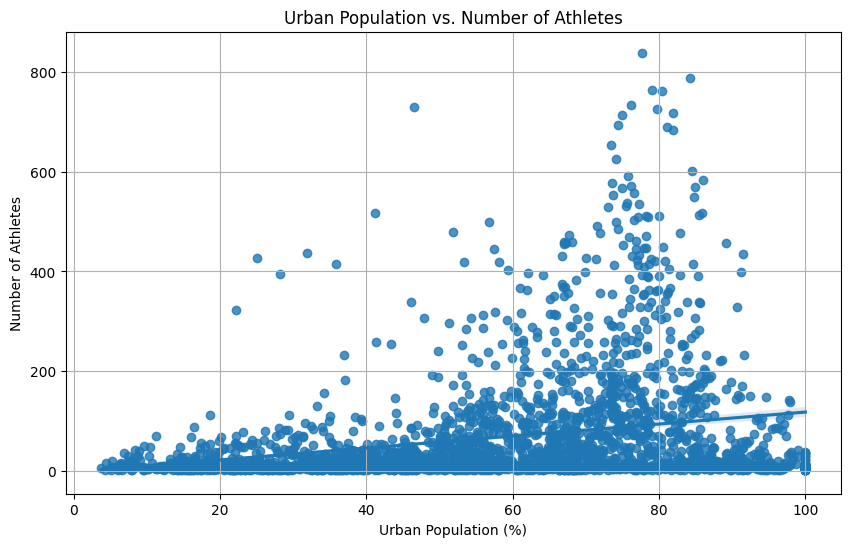

(0.2589484209494651, 1.5248976097363388e-40)

In [ ]:
# Hypothesis 1: Relationship between Urban Population and Olympic Participation

# Calculating Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(olympic_data['Urban_Pop'], olympic_data['Count_Athlete'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='Urban_Pop', y='Count_Athlete', data=olympic_data)
plt.title('Urban Population vs. Number of Athletes')
plt.xlabel('Urban Population (%)')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

# Displaying results
correlation_coefficient, p_value

The first hypothesis testing scenario regarding the relationship between urban population and Olympic participation yields the following results:

Pearson Correlation Coefficient: 0.259

P-value: 1.52×10<sup>−40</sup>

The positive correlation coefficient suggests a weak to moderate positive relationship between the percentage of urban population in a country and the number of athletes it sends to the Olympics. The extremely low p-value indicates that this result is statistically significant, thus we can reject the null hypothesis (H0) that there is no correlation.

The plot visualizes this relationship, showing a general trend where countries with higher urban population percentages tend to send more athletes to the Olympics, albeit with considerable variation.

### 2. Impact of Literacy Rate on Olympic Participation

- Null Hypothesis (H0): The literacy rate of a country does not significantly affect its participation in the Olympics.
- Alternate Hypothesis (H1): Higher literacy rates in a country are associated with a higher participation in the Olympics.

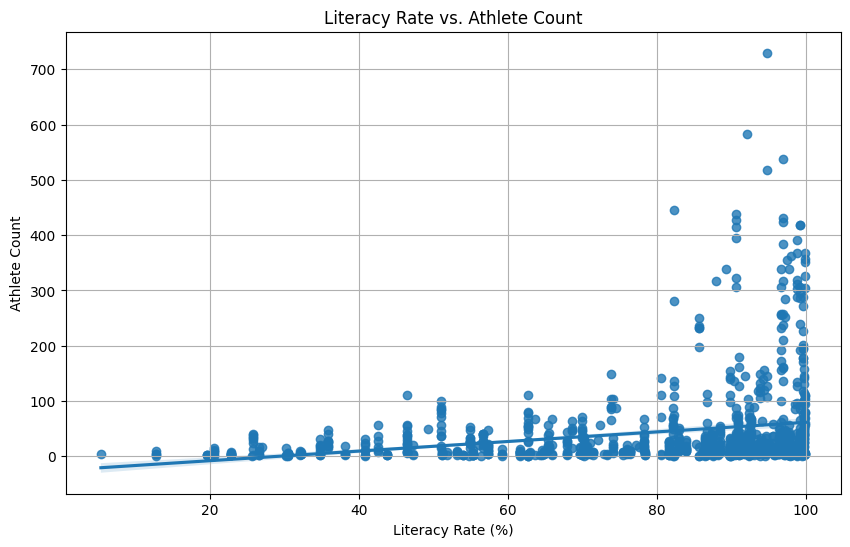

(0.22994263238105422, 3.0251622787859615e-14)

In [ ]:
# Hypothesis 2: Impact of Literacy Rate on Olympic Participation

# Dropping rows where literacy rate or medal count is missing
filtered_data = olympic_data.dropna(subset=['Literacy_Rate', 'Count_Athlete'])

# Calculating Pearson correlation coefficient for literacy rate and participation
correlation_coefficient_lit, p_value_lit = stats.pearsonr(filtered_data['Literacy_Rate'], filtered_data['Count_Athlete'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='Literacy_Rate', y='Count_Athlete', data=filtered_data)
plt.title('Literacy Rate vs. Athlete Count')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Athlete Count')
plt.grid(True)
plt.show()

# Displaying results
correlation_coefficient_lit, p_value_lit

The second hypothesis testing scenario, which examines the impact of literacy rate on the participation, provides the following results:

Pearson Correlation Coefficient: 0.229

P-value: 3.02×10<sup>−14</sup>

This result indicates a weak positive correlation between a country's literacy rate and its participation in the Olympics. The p-value, being significantly low, suggests that this correlation is statistically significant. Therefore, we can reject the null hypothesis (H0) that states the literacy rate of a country does not significantly affect its participation in the Olympics.

The plot visually supports this finding, showing an upward trend, indicating that countries with higher literacy rates tend to participate more in the Olympics, although the relationship is not strong.

### 3. Gender Ratio and Olympic Success

- Null Hypothesis (H0): The gender ratio (male to female) of a country's Olympic team does not influence its success in terms of medal count.
- Alternate Hypothesis (H1): A more balanced gender ratio in a country's Olympic team is associated with greater Olympic success.

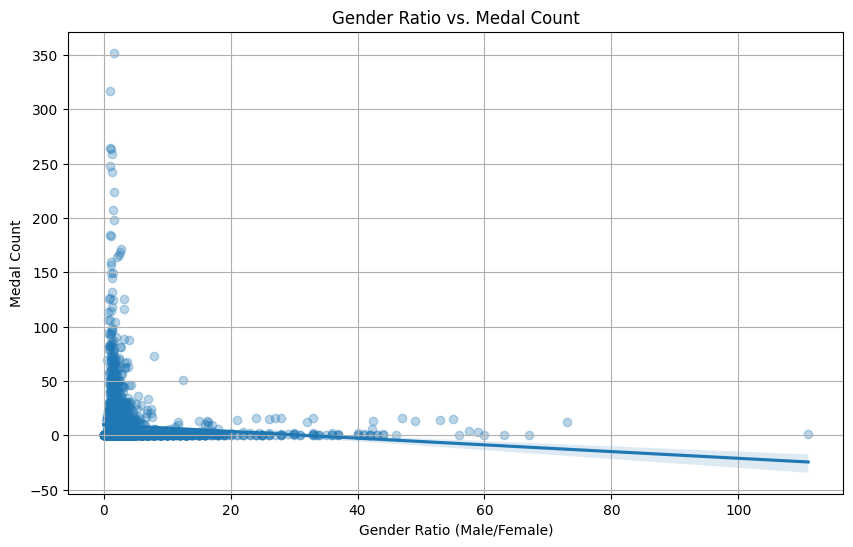

(-0.08831338783462525, 7.551154281333588e-06)

In [ ]:
# Hypothesis 3: Gender Ratio and Olympic Success

# Calculating the gender ratio (male to female) for each country's Olympic team
olympic_data['Gender_Ratio'] = olympic_data['Count_Male'] / (olympic_data['Count_Female'] + 1)  # Adding 1 to avoid division by zero

# Dropping rows where gender ratio or medal count is missing or infinite
filtered_data_gender = olympic_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Gender_Ratio', 'Count_Medal'])

# Calculating Pearson correlation coefficient for gender ratio and medal count
correlation_coefficient_gender, p_value_gender = stats.pearsonr(filtered_data_gender['Gender_Ratio'], filtered_data_gender['Count_Medal'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='Gender_Ratio', y='Count_Medal', data=filtered_data_gender, scatter_kws={'alpha':0.3})
plt.title('Gender Ratio vs. Medal Count')
plt.xlabel('Gender Ratio (Male/Female)')
plt.ylabel('Medal Count')
plt.grid(True)
plt.show()

# Displaying results
correlation_coefficient_gender, p_value_gender

The third hypothesis testing scenario, concerning the gender ratio in Olympic teams and their success in terms of medal count, yields the following results:

Pearson Correlation Coefficient: −0.088

P-value: 7.55×10<sup>−6</sup>

The negative correlation coefficient indicates a weak inverse relationship between the gender ratio (male to female) in a country's Olympic team and its success as measured by medal count. The low p-value suggests that this correlation is statistically significant, allowing us to reject the null hypothesis (H0) which stated that the gender ratio does not influence Olympic success.

The plot shows a slight downward trend, implying that a more balanced gender ratio (closer to unity) could be associated with a higher medal count, although the relationship is not strongly pronounced.

### 4. Relationship between Population Density and Olympic Success

- Null Hypothesis (H0): Population density of a country has no impact on its overall success in the Olympics.
- Alternate Hypothesis (H1): Countries with higher population densities tend to have more success in the Olympics (measured in terms of medals won).

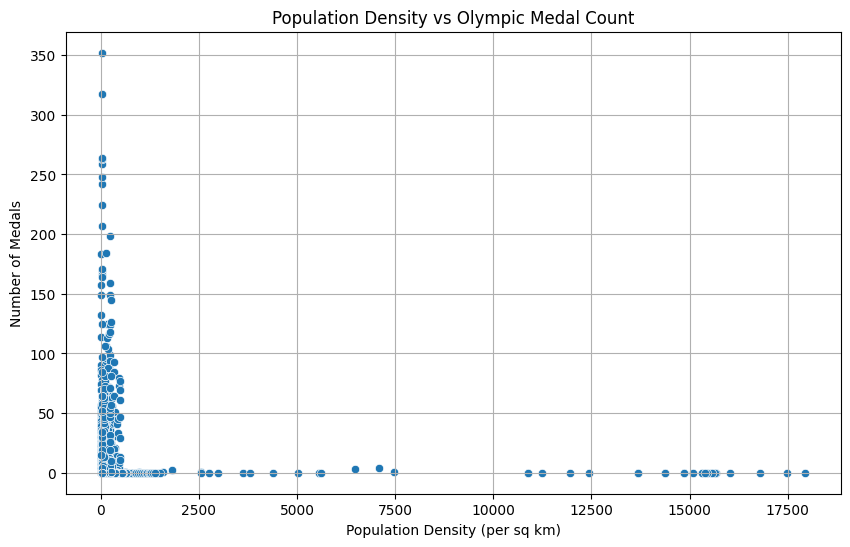

(-0.03826830968817645, 0.0527283578437054)

In [ ]:
# Hypothesis 4: Relationship between Population Density and Olympic Success

# Preparing the data
population_density = olympic_data['Pop_Density']

# Dropping rows where literacy rate or medal count is missing
filtered_data = olympic_data.dropna(subset=['Pop_Density', 'Count_Medal'])

# Calculating Pearson correlation coefficient for population density and medal count
corr_coefficient_density, p_value_density = stats.pearsonr(filtered_data['Pop_Density'], filtered_data['Count_Medal'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pop_Density', y='Count_Medal', data=filtered_data)
plt.title('Population Density vs Olympic Medal Count')
plt.xlabel('Population Density (per sq km)')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

corr_coefficient_density, p_value_density

For the fourth hypothesis regarding the relationship between population density and Olympic success, the results are as follows:

Pearson Correlation Coefficient: −0.038

P-value: 0.053

The correlation coefficient indicates a very weak, almost negligible negative relationship between population density and the number of Olympic medals won. The p-value is marginally above the conventional threshold of 0.05, suggesting that the result is not statistically significant. Therefore, we do not find sufficient evidence to reject the null hypothesis; thus, it appears that population density does not have a significant impact on Olympic success.

### 5. Effect of Political Stability on Athlete Count

- Null Hypothesis (H0): Political stability in a country does not affect the number of athletes it sends to the Olympics.
- Alternate Hypothesis (H1): Countries with higher political stability send more athletes to the Olympics.

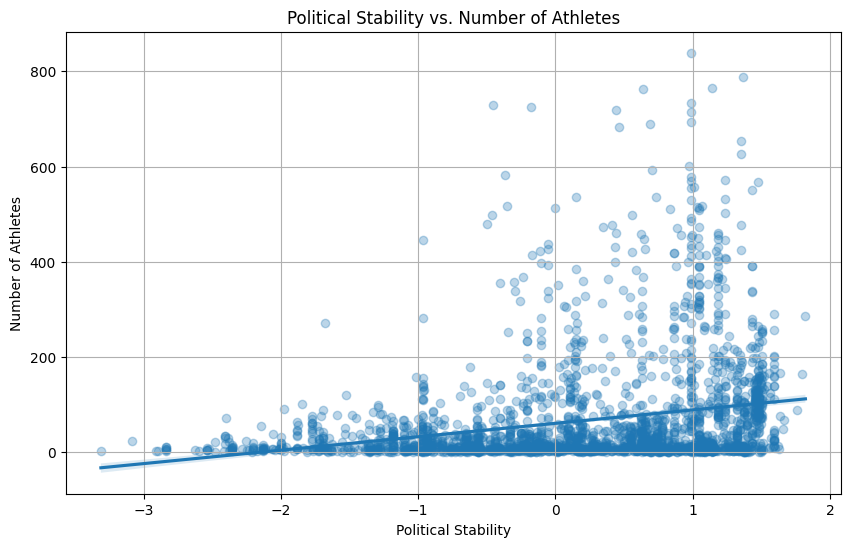

(0.24634454774833706, 9.72757027238973e-37)

In [ ]:
# Hypothesis 5: Effect of Political Stability on Athlete Count

# Dropping rows where political stability or athlete count is missing
filtered_data_political = olympic_data.dropna(subset=['Political_Stability', 'Count_Athlete'])

# Calculating Pearson correlation coefficient for political stability and athlete count
correlation_coefficient_political, p_value_political = stats.pearsonr(filtered_data_political['Political_Stability'], filtered_data_political['Count_Athlete'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='Political_Stability', y='Count_Athlete', data=filtered_data_political, scatter_kws={'alpha':0.3})
plt.title('Political Stability vs. Number of Athletes')
plt.xlabel('Political Stability')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

# Displaying results
correlation_coefficient_political, p_value_political

For the fifth hypothesis regarding the relationship between political stability and Athlete count, the results are as follows:

Pearson Correlation Coefficient: 0.24

P-value: 9.72×10<sup>−37</sup>

This result indicates a weak positive correlation between a country's political stability and its participation in the Olympics. The p-value, being significantly low, suggests that this correlation is statistically significant. Therefore, we can reject the null hypothesis (H0) that states the political stability of a country does not significantly affect its participation in the Olympics.